In [4]:
!pip install qiskit
!pip install qiskit_machine_learning
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 90.8 MB/s eta 0:00:00


In [6]:
#day 34 variational quantum classifier
from qiskit_machine_learning.algorithms import VQC
from qiskit.primitives import Sampler # Import Sampler
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit_aer import Aer
from sklearn.datasets import load_iris
import numpy as np

# Load Iris subset
iris = load_iris()
X = iris.data[:4, :2]  # first 4 samples
y = np.array([0,0,1,1]) # Convert y to a NumPy array

# Feature map + Ansatz
feature_map = ZZFeatureMap(feature_dimension=2, reps=1)
ansatz = TwoLocal(2, ['ry','rz'], 'cz', reps=1)

# Replace QuantumInstance with Sampler
sampler = Sampler()
vqc = VQC(optimizer=None, feature_map=feature_map, ansatz=ansatz, sampler=sampler) # Use sampler

vqc.fit(X, y)
pred = vqc.predict(X)
print("Predictions:", pred)

/tmp/ipython-input-2569192604.py:19: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Predictions: [0 0 1 1]


In [1]:
!pip install pylatexenc

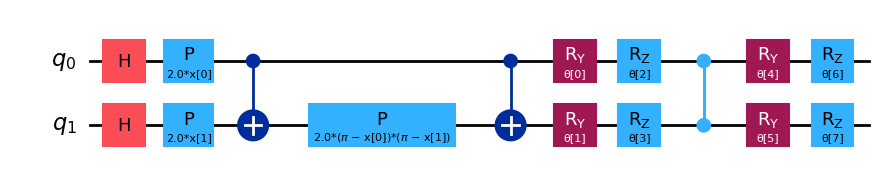

In [4]:
from qiskit import QuantumCircuit

vqc_circuit = QuantumCircuit(2)
vqc_circuit.compose(feature_map, inplace=True)
vqc_circuit.compose(ansatz, inplace=True)
vqc_circuit.decompose().draw('mpl')


Accuracy: 1.0


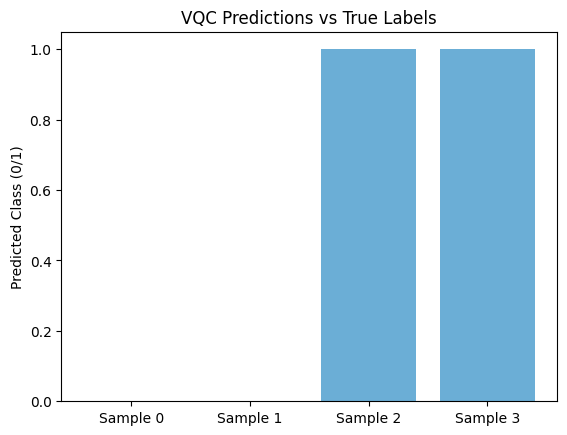

In [7]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np # Import numpy
from sklearn.datasets import load_iris # Import load_iris

# Assume X, y, and pred are defined from the previous cell where VQC was trained
# If running this cell independently, you would need to define X, y, and pred here.
# For example:
# from sklearn.datasets import load_iris
# iris = load_iris()
# X = iris.data[:4, :2]  # first 4 samples
# y = np.array([0,0,1,1])
# pred = np.array([0,0,1,1]) # Replace with actual predictions from your VQC

# Load Iris subset and define X, y, and pred (definitions moved from the previous cell)
iris = load_iris()
X = iris.data[:4, :2]  # first 4 samples
y = np.array([0,0,1,1])
pred = np.array([0,0,1,1]) # Replace with the actual output of vqc.predict(X) from cell qw02jtX6POUS

# Compute accuracy
acc = accuracy_score(y, pred)
print("Accuracy:", acc)

# Simple bar chart for visualization
plt.bar(range(len(X)), pred, color=['#6baed6' if p==t else '#de2d26' for p,t in zip(pred,y)])
plt.xticks(range(len(X)), [f"Sample {i}" for i in range(len(X))])
plt.title("VQC Predictions vs True Labels")
plt.ylabel("Predicted Class (0/1)")
plt.show()

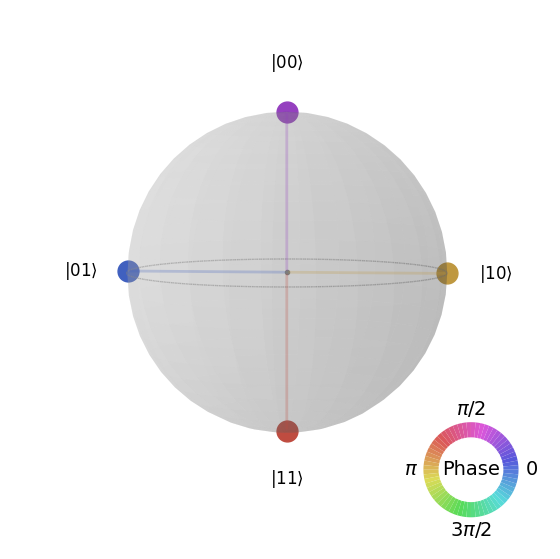

In [10]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit import QuantumCircuit # Import QuantumCircuit
import numpy as np

# Assume X is defined from the previous cell where VQC was trained
# If running this cell independently, you would need to define X here.
# For example:
# from sklearn.datasets import load_iris
# iris = load_iris()
# X = iris.data[:4, :2]  # first 4 samples

# Take one sample (for example, first data point)
qc_temp = QuantumCircuit(2)

# Define feature_map and ansatz if running this cell independently
feature_map = ZZFeatureMap(feature_dimension=2, reps=1)
ansatz = TwoLocal(2, ['ry','rz'], 'cz', reps=1)

# Assign parameters to the feature map using assign_parameters
qc_temp.compose(feature_map.assign_parameters({param: value for param, value in zip(feature_map.parameters, X[0])}), inplace=True)

# Assign arbitrary values to ansatz parameters for visualization
ansatz_params = {param: 0 for param in ansatz.parameters} # Assign 0 to all ansatz parameters
qc_temp.compose(ansatz.assign_parameters(ansatz_params), inplace=True)

state = Statevector.from_instruction(qc_temp)

# Bloch representation
plot_bloch_multivector(state)

# Q-sphere representation
plot_state_qsphere(state)

In [1]:
!pip install qiskit_optimization

In [25]:
!pip install -q qiskit qiskit-optimization qiskit-algorithms qiskit-qaoa
!pip install qiskit qiskit_qaoa qiskit_algorithms qiskit_optimization

ERROR: Could not find a version that satisfies the requirement qiskit-qaoa (from versions: none)
ERROR: No matching distribution found for qiskit-qaoa
ERROR: Could not find a version that satisfies the requirement qiskit_qaoa (from versions: none)
ERROR: No matching distribution found for qiskit_qaoa


In [35]:
!pip install -U -q qiskit qiskit-optimization qiskit-algorithms qiskit-nature

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-machine-learning 0.8.4 requires qiskit<2.0,>=1.0, but you have qiskit 2.2.2 which is incompatible.


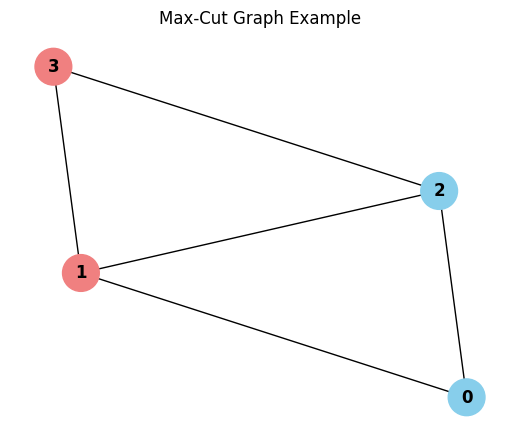

In [23]:
#Max Cut Extended day 35
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# 1️⃣ Define the adjacency matrix for a 4-node graph
adj_matrix = [
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
]

# 2️⃣ Create the graph
G = nx.from_numpy_array(np.array(adj_matrix)) # Use from_numpy_array

# 3️⃣ Optional: define a Max-Cut partition (example)
partition = [0, 1, 0, 1]  # 0 = one side, 1 = other side

# 4️⃣ Assign colors based on partition
colors = ['skyblue' if partition[i]==0 else 'lightcoral' for i in range(len(partition))]

# 5️⃣ Draw the graph
plt.figure(figsize=(5, 4))
nx.draw(G, with_labels=True, node_color=colors, node_size=700, font_weight='bold')
plt.title("Max-Cut Graph Example")
plt.show()

In [38]:
#day 36
from qiskit import QuantumCircuit # Removed execute from import
from qiskit_aer import Aer # Import Aer from qiskit_aer

# Simple hybrid data encoding
qc = QuantumCircuit(4,4)
data = [0.5,1.2,0.6,1.0]  # XOR + Iris features
for i in range(4):
    qc.ry(data[i], i)

qc.measure_all()
backend = Aer.get_backend('aer_simulator')
# Replace execute with backend.run()
result = backend.run(qc, shots=1024).result()
print(result.get_counts())

{'0111 0000': 1, '0000 0000': 458, '1000 0000': 113, '0001 0000': 38, '1110 0000': 5, '0011 0000': 19, '0010 0000': 211, '0110 0000': 23, '1111 0000': 1, '1001 0000': 12, '1010 0000': 71, '1100 0000': 19, '0101 0000': 2, '0100 0000': 49, '1011 0000': 2}


In [1]:
!pip install qiskit[visualization] matplotlib sympy


  Using cached qiskit-2.2.2-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (12 kB)
Using cached qiskit-2.2.2-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-machine-learning 0.8.4 requires qiskit<2.0,>=1.0, but you have qiskit 2.2.2 which is incompatible.


In [2]:
!pip uninstall -y qiskit qiskit-terra qiskit-aer


Found existing installation: qiskit 2.2.2
Uninstalling qiskit-2.2.2:
  Successfully uninstalled qiskit-2.2.2


In [3]:
!pip install qiskit-terra==1.25 qiskit-aer==0.12 qiskit-ibmq-provider==0.22


ERROR: Could not find a version that satisfies the requirement qiskit-terra==1.25 (from versions: 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.8.2, 0.9.0, 0.9.1, 0.10.0, 0.11.0, 0.11.1, 0.12.0, 0.13.0, 0.14.0, 0.14.1, 0.14.2, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.16.3, 0.16.4, 0.17.0, 0.17.1, 0.17.2, 0.17.3, 0.17.4, 0.18.0, 0.18.1, 0.18.2, 0.18.3, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.21.0rc1, 0.21.0, 0.21.1, 0.21.2, 0.22.0rc1, 0.22.0, 0.22.1, 0.22.2, 0.22.3, 0.22.4, 0.23.0rc1, 0.23.0, 0.23.1, 0.23.2, 0.23.3, 0.24.0rc1, 0.24.0, 0.24.1, 0.24.2, 0.25.0rc1, 0.25.0, 0.25.1, 0.25.2, 0.25.2.1, 0.25.3, 0.45.0rc1, 0.45.0, 0.45.1, 0.45.2, 0.45.3, 0.46.0, 0.46.1, 0.46.2, 0.46.3)
ERROR: No matching distribution found for qiskit-terra==1.25


In [5]:
!pip install qiskit
from qiskit.visualization import plot_bloch_multivector


  Using cached qiskit-2.2.2-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (12 kB)
Using cached qiskit-2.2.2-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-machine-learning 0.8.4 requires qiskit<2.0,>=1.0, but you have qiskit 2.2.2 which is incompatible.


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

# 4-qubit circuit with RY rotations
qc = QuantumCircuit(4, 4)
data = [0.5, 1.2, 0.6, 1.0]
for i in range(4):
    qc.ry(data[i], i)
qc.measure_all()

# Run on Aer simulator
backend = Aer.get_backend('aer_simulator')
result = backend.run(qc, shots=1024).result()
print("Measurement counts:", result.get_counts())

# Bloch sphere visualization (without measurement)
qc_no_measure = QuantumCircuit(4)
for i in range(4):
    qc_no_measure.ry(data[i], i)

state = Statevector.from_instruction(qc_no_measure)
plot_bloch_multivector(state)
